# Google Quest QA Labeling

## 1. Data retrieval

### 1.1. Import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from matplotlib_venn import venn2

from sklearn.feature_extraction.text import TfidfVectorizer


from src import brain

%matplotlib inline

### 1.2. Reading Data

In [2]:
train_set = pd.read_csv('data/train.csv')
X_test = pd.read_csv('data/test.csv')
X_test

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com
...,...,...,...,...,...,...,...,...,...,...,...
471,9569,change gb4e enumeration in only one chapter,I am using gb4e for glossing examples in my th...,ToddAO,https://tex.stackexchange.com/users/28332,You can simply reset the exx counter just afte...,karlkoeller,https://tex.stackexchange.com/users/27635,http://tex.stackexchange.com/questions/165120/...,TECHNOLOGY,tex.stackexchange.com
472,9590,All anagrams in a File,Source : Microsoft Interview Question\n\nWe ar...,Spandan,https://stackoverflow.com/users/2426101,Slightly different approach from the one above...,Algorithmatic,https://stackoverflow.com/users/1122229,http://stackoverflow.com/questions/16872513/al...,STACKOVERFLOW,stackoverflow.com
473,9597,SQL Server: Time Series Table Design,I am creating a time series database that foll...,Jay Michael,https://dba.stackexchange.com/users/47001,A foreign key can reference a unique constrain...,mustaccio,https://dba.stackexchange.com/users/23721,http://dba.stackexchange.com/questions/105287/...,TECHNOLOGY,dba.stackexchange.com
474,9623,Is a countered flashback spell exiled?,If I flashback Past in Flames and it is counte...,BolasStone,https://boardgames.stackexchange.com/users/9981,If you counter a spell cast for its Flashback ...,murgatroid99,https://boardgames.stackexchange.com/users/2537,http://boardgames.stackexchange.com/questions/...,CULTURE,boardgames.stackexchange.com


In [3]:
train_set = np.split(train_set, [train_set.columns.get_loc('question_asker_intent_understanding')], axis=1)
X_train = train_set[0]
X_train

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com
...,...,...,...,...,...,...,...,...,...,...,...
6074,9642,Using a ski helmet for winter biking,I am curious if anyone uses a skiing helmet fo...,sixtyfootersdude,https://bicycles.stackexchange.com/users/134,If you're thinking about wearing a ski helmet ...,Matt Leo,https://bicycles.stackexchange.com/users/3340,http://bicycles.stackexchange.com/questions/99...,CULTURE,bicycles.stackexchange.com
6075,9643,Adjustment to road bike brakes for high grade ...,I have a road bike with a front brake that wea...,ash,https://bicycles.stackexchange.com/users/14519,\nYou can replace the pads (as stated elsewher...,Daniel R Hicks,https://bicycles.stackexchange.com/users/1584,http://bicycles.stackexchange.com/questions/25...,CULTURE,bicycles.stackexchange.com
6076,9645,Suppress 'file truncated' messages when using ...,I'm tailing a log file using tail -f messages....,Maneating Koala,https://unix.stackexchange.com/users/60445,Maybe help if can be fixes origin of this erro...,BG Bruno,https://unix.stackexchange.com/users/68208,http://unix.stackexchange.com/questions/169054...,TECHNOLOGY,unix.stackexchange.com
6077,9646,When should a supervisor be a co-author?,What are people's views on this? To be specif...,MrB,https://mathoverflow.net/users/2189,"As a non-mathematician, I am somewhat mystifie...",angela,https://mathoverflow.net/users/4267,http://mathoverflow.net/questions/57337,SCIENCE,mathoverflow.net


In [4]:
Y_train = pd.concat([X_train['qa_id'], train_set[1]], axis=1)
Y_train

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,1,0.333333,0,0,0,0,1,1,0,...,1,1,0.666667,1,1,0.8,1,0,0,1
1,1,1,1,0,0.5,1,1,0.444444,0.444444,0.666667,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0,0,0.666667,0.888889
2,2,0.888889,0.666667,0,1,1,1,0.666667,0.444444,0.333333,...,0.777778,0.777778,0.555556,1,1,0.666667,0,0.333333,1,0.888889
3,3,0.888889,0.666667,0.666667,1,1,1,0.444444,0.444444,0,...,0.888889,0.833333,0.333333,0.833333,1,0.8,0,0,1,1
4,5,1,0.666667,0,1,1,1,0.666667,0.666667,0,...,1,1,0.666667,1,1,0.8,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,9642,1,0.777778,0,1,1,1,0.888889,0.888889,0.333333,...,0.777778,1,0.555556,1,1,0.866667,0,0,0,0.888889
6075,9643,1,0.777778,0,1,0.666667,0.5,0.777778,0.777778,0,...,0.777778,0.888889,0.555556,1,1,0.733333,0.666667,0.333333,0,0.888889
6076,9645,0.888889,0.555556,0,0.666667,0.333333,1,0.444444,0.333333,0,...,0.444444,0.888889,0.555556,0.888889,0.888889,0.8,1,0,0.333333,0.555556
6077,9646,1,0.444444,0.333333,0,0,0,0.777778,0.555556,1,...,1,0.888889,0.555556,1,1,0.533333,0,0.333333,0.666667,1


## 2. Exploratory Data analysis

In [5]:
analysis = brain.Analysis()

### 2.1. Data Description

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 11 columns):
qa_id                 6079 non-null object
question_title        6079 non-null object
question_body         6079 non-null object
question_user_name    6079 non-null object
question_user_page    6079 non-null object
answer                6079 non-null object
answer_user_name      6079 non-null object
answer_user_page      6079 non-null object
url                   6079 non-null object
category              6079 non-null object
host                  6079 non-null object
dtypes: object(11)
memory usage: 522.5+ KB


In [7]:
X_train.describe()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
count,6079,6079,6079,6079,6079,6079,6079,6079,6079,6079,6079
unique,6079,3583,3583,3215,3422,6079,4114,4430,3583,5,63
top,9081,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Mike,https://stats.stackexchange.com/users/5,You can use this script. Attach it to your ca...,Scott,https://tex.stackexchange.com/users/4427,http://stats.stackexchange.com/questions/125/w...,TECHNOLOGY,stackoverflow.com
freq,1,12,12,15,12,1,20,17,12,2441,1253


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 11 columns):
qa_id                 476 non-null int64
question_title        476 non-null object
question_body         476 non-null object
question_user_name    476 non-null object
question_user_page    476 non-null object
answer                476 non-null object
answer_user_name      476 non-null object
answer_user_page      476 non-null object
url                   476 non-null object
category              476 non-null object
host                  476 non-null object
dtypes: int64(1), object(10)
memory usage: 41.0+ KB


In [9]:
X_test.describe()

,qa_id
count,476.000000
mean,5029.186975
std,2812.670060
min,39.000000
25%,2572.000000
50%,5093.000000
75%,7482.000000
max,9640.000000


In [10]:
print('Size of X_train', X_train.shape)
print('Size of Y_train', Y_train.shape)
print('Size of X_test', X_test.shape)

Size of X_train (6079, 11)
Size of Y_train (6079, 31)
Size of X_test (476, 11)


### 2.2. Host distribution visualization

In [11]:
X_train_host_dist = X_train["host"].value_counts()
X_test_host_dist = X_test["host"].value_counts()

In [12]:
analysis.host_distribution(X_train_host_dist, 'Host data distribution on train data')

In [13]:
analysis.host_distribution(X_test_host_dist, 'Host data distribution on test data')

### 2.3. Categories distribution

In [14]:
analysis.categories_distribution(X_train['category'], 'X_train categories distribution barplot')

In [15]:
analysis.categories_distribution(X_test['category'], 'X_test categories distribution barplot')

### 2.4. Common features in training and testing set (Venn diagrams)

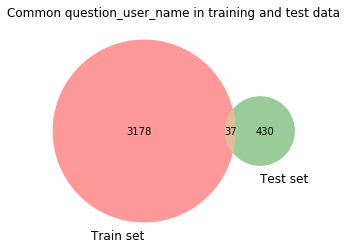

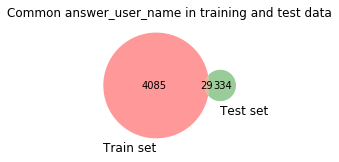

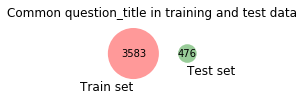

In [16]:
analysis.venn_diagrams([X_train['question_user_name'], X_test['question_user_name']], 111, 'Common question_user_name in training and test data')
analysis.venn_diagrams([X_train['answer_user_name'], X_test['answer_user_name']], 121, 'Common answer_user_name in training and test data')
analysis.venn_diagrams([X_train['question_title'], X_test['question_title']], 131, 'Common question_title in training and test data')

### 2.5. Length of contents

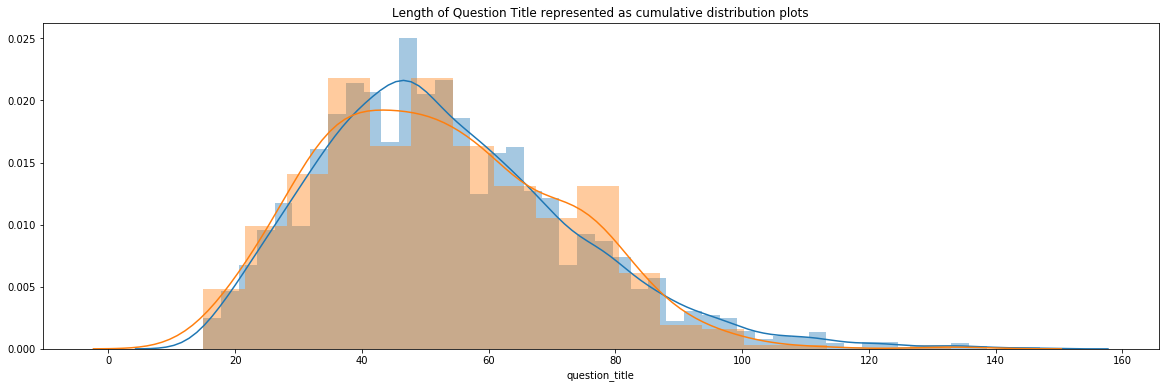

In [17]:
analysis.distribution_imposition(X_train['question_title'], X_test['question_title'], 'Length of Question Title represented as cumulative distribution plots')

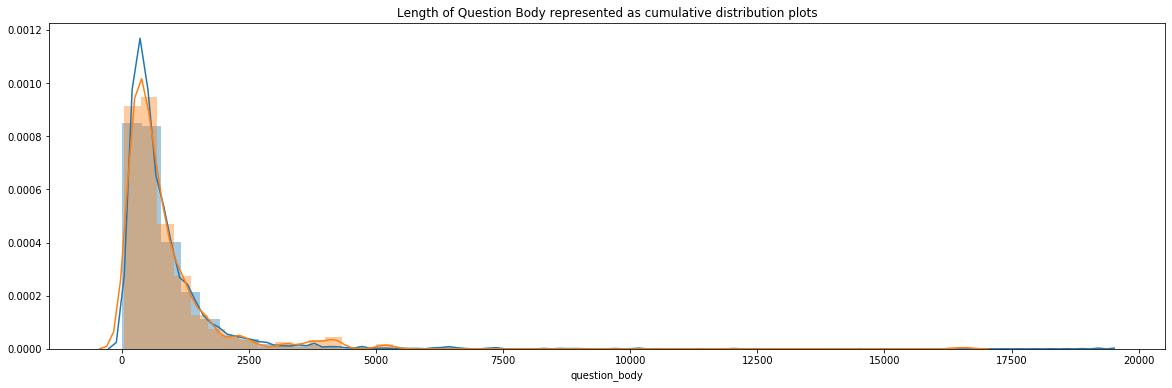

In [18]:
analysis.distribution_imposition(X_train['question_body'], X_test['question_body'], 'Length of Question Body represented as cumulative distribution plots')

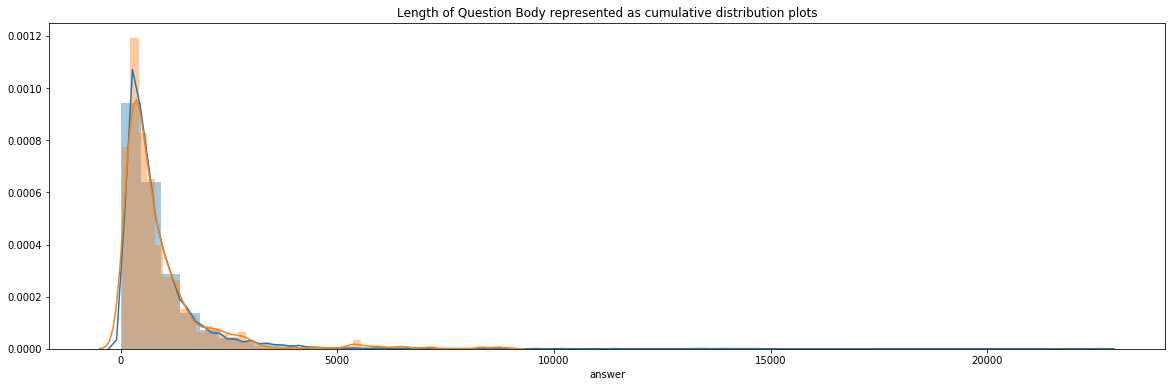

In [19]:
analysis.distribution_imposition(X_train['answer'], X_test['answer'], 'Length of Question Body represented as cumulative distribution plots')

### 2.6. Most popular questions

In [32]:
X_train.groupby('question_title').count()['qa_id'].sort_values(ascending=False).head(25)

question_title
What is the best introductory Bayesian statistics textbook?                        12
What does mathematics have to do with programming?                                 11
Important non-technical course for programmers?                                    11
How to prevent the "Too awesome to use" syndrome                                    9
Another instructor is pushing me out of the classroom right after my class ends     7
No sound in Ubuntu except at log in                                                 7
How do I deal with a slow and undedicated colleague in the team?                    7
What are the benefits of owning a physical book?                                    7
House rules to make the cloister less of a game winning tile in Carcassonne?        6
Making sure that you have comprehended a concept                                    6
hide javascript/jquery scripts from html page?                                      6
What is the best place to start Warhamm

In [33]:
X_train[X_train['question_title'] == 'What is the best introductory Bayesian statistics textbook?']

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
229,366,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"""Bayesian Core: A Practical Approach to Comput...",gappy,https://stats.stackexchange.com/users/30,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
1616,2536,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I am now reading : From Algorithm to Z-Scores:...,Fabio,https://stats.stackexchange.com/users/40316,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
1647,2591,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"My favorite is ""Bayesian Data Analysis"" by Gel...",Shane,https://stats.stackexchange.com/users/5,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
2104,3349,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I have read some parts of A First Course in Ba...,George Dontas,https://stats.stackexchange.com/users/339,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
3476,5543,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"Sivia and Skilling, Data analysis: a Bayesian ...",denis,https://stats.stackexchange.com/users/557,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
3762,5989,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,If I had to choose a single text for a beginne...,Jim Stone,https://stats.stackexchange.com/users/26779,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
3801,6041,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"Take a look at ""The Bayesian Choice"". It has t...",Zen,https://stats.stackexchange.com/users/9394,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
3899,6215,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I found an excellent introduction in Gelman an...,Jack Tanner,https://stats.stackexchange.com/users/8207,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
4408,7003,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,Its focus isn't strictly on Bayesian statistic...,Joe,https://stats.stackexchange.com/users/1119,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com
5239,8328,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I read:\n\nGelman et al (2013). Bayesian Data ...,stochazesthai,https://stats.stackexchange.com/users/44171,http://stats.stackexchange.com/questions/125/w...,SCIENCE,stats.stackexchange.com


## 3. Feature Engineering